# **SIOC 221A - Analysis of Physical Oceanographic Data (A) - Problem 3** 

# Caique Dias Luko 






### We’ve talked about least-squares fitting, and we’ve talked about the $\chi^2$ distribution, so it’s time to explore both more closely. Here we’ll use wave height, wind speed, and air temperature data from National Data Buoy Center buoy 46047. The data are available here:

### https://www.ndbc.noaa.gov/historical_data.shtml

### Download the “standard meteorological” data files for buoy 46047 for 2015 and 2016. (If you’re curious you can grab the subsequent 4 years as well: 2017, 2018, 2019, and 2020.) 

### 1. Visual evaluation. Plot the time series of wind speed, wave height, water temperature, and air temperature from 46047. How are missing data identified in the records?

Let's start by writing a bash program to download the data from 2015 to 2020 to a local directory:

\###

cd 

cd /home/caique/Documentos/PhD_Courses/SIOC221A_DATA1/Homeworks/data/buoy46047/

wget https://www.ndbc.noaa.gov/data/historical/stdmet/46047h{2015..2020}.txt.gz

gunzip *.gz

\###

This program was saved on a file called download46047.sh which was pushed to GitHub.

Now, let's define a function to load multi-year records from this buoy:

In [1]:
def Get46047DataMY(path,year_start=None,year_end=None):
    # This function returns a multi-year wind speed, wave height, water temperature, and air temperature 
    # from  the 46047 buoy.
    # (https://www.ndbc.noaa.gov/historical_data.shtml)
    
    # The path must be a directory containing all the 46047 buoy data from 2015-2020
    # year_start is the start year of interest (must be between 2015 and 2020)
    # year_end is the end year of interest (must be between 2015 and 2020)
    # Default is year_start and year_start equal to None (all the 2015-2020 record will be loaded)
    # CDL SIO211A 10/13/2022

    # Important packages
    import datetime                   # Manage time vectors
    import pandas as pd               # Useful to work with DataFrames and also to manage time
    from glob import glob             # To load a lot of files with same extension
    import numpy as np                # Using arrays and loading txt files
    
    # Getting path from all the files (2005-2021)
    files = glob(path+'46047*.txt')
    files.sort()
    files=np.array(files)
    years = np.arange(2015,2021,1)
    if (year_start != None) and (year_end != None): # Selecting files from the chosen years
        files = files[(years>=year_start)&(years<=year_end)]
        
    # Loading loop for the selected files
    for f in range(len(files)):
        # Loading time
        dat = np.loadtxt(files[f],skiprows=3)
    
        # Converting time vector
        timev = [str(datetime.datetime(int(dat[i,0]),int(dat[i,1]),int(dat[i,2]),int(dat[i,3]),int(dat[i,4]))) for i in np.arange(dat.shape[0])]
        timev = pd.to_datetime(timev)

        # Loading wind speed, wave height, water temperature and air temperature
        wspd = dat[:,6]
        wvht = dat[:,8]
        wtemp = dat[:,14]
        atemp = dat[:,13]
        
        # Concatenating data from different files
        if f==0:
            TIMEV,WSPD,WVHT,WTEMP,ATEMP=np.array(timev),np.array(wspd),np.array(wvht),np.array(wtemp),np.array(atemp)
        else:
            TIMEV = np.concatenate((TIMEV,np.array(timev)))
            WSPD = np.concatenate((WSPD,np.array(wspd)))
            WVHT = np.concatenate((WVHT,np.array(wvht)))
            WTEMP = np.concatenate((WTEMP,np.array(wtemp)))
            ATEMP = np.concatenate((ATEMP,np.array(atemp)))
                
    return pd.DataFrame({'wspd':WSPD,'wvht':WVHT,'wtemp':WTEMP,'atemp':ATEMP,'time':TIMEV}) # Pier object


import numpy as np
import pandas as pd
import datetime

# Directory with all the 46047 buoy data (2015-2020)
path = '/home/caique/Documentos/PhD_Courses/SIOC221A_DATA1/Homeworks/data/buoy46047/'

# Loading record for 2015 and 2016
buoy = Get46047DataMY(path,year_start=2015,year_end=2016)
wspd = np.array(buoy.wspd)
wvht = np.array(buoy.wvht)
wtemp = np.array(buoy.wtemp)
atemp = np.array(buoy.atemp)
timev = pd.to_datetime(np.array(buoy.time))


Now let's plot the data:

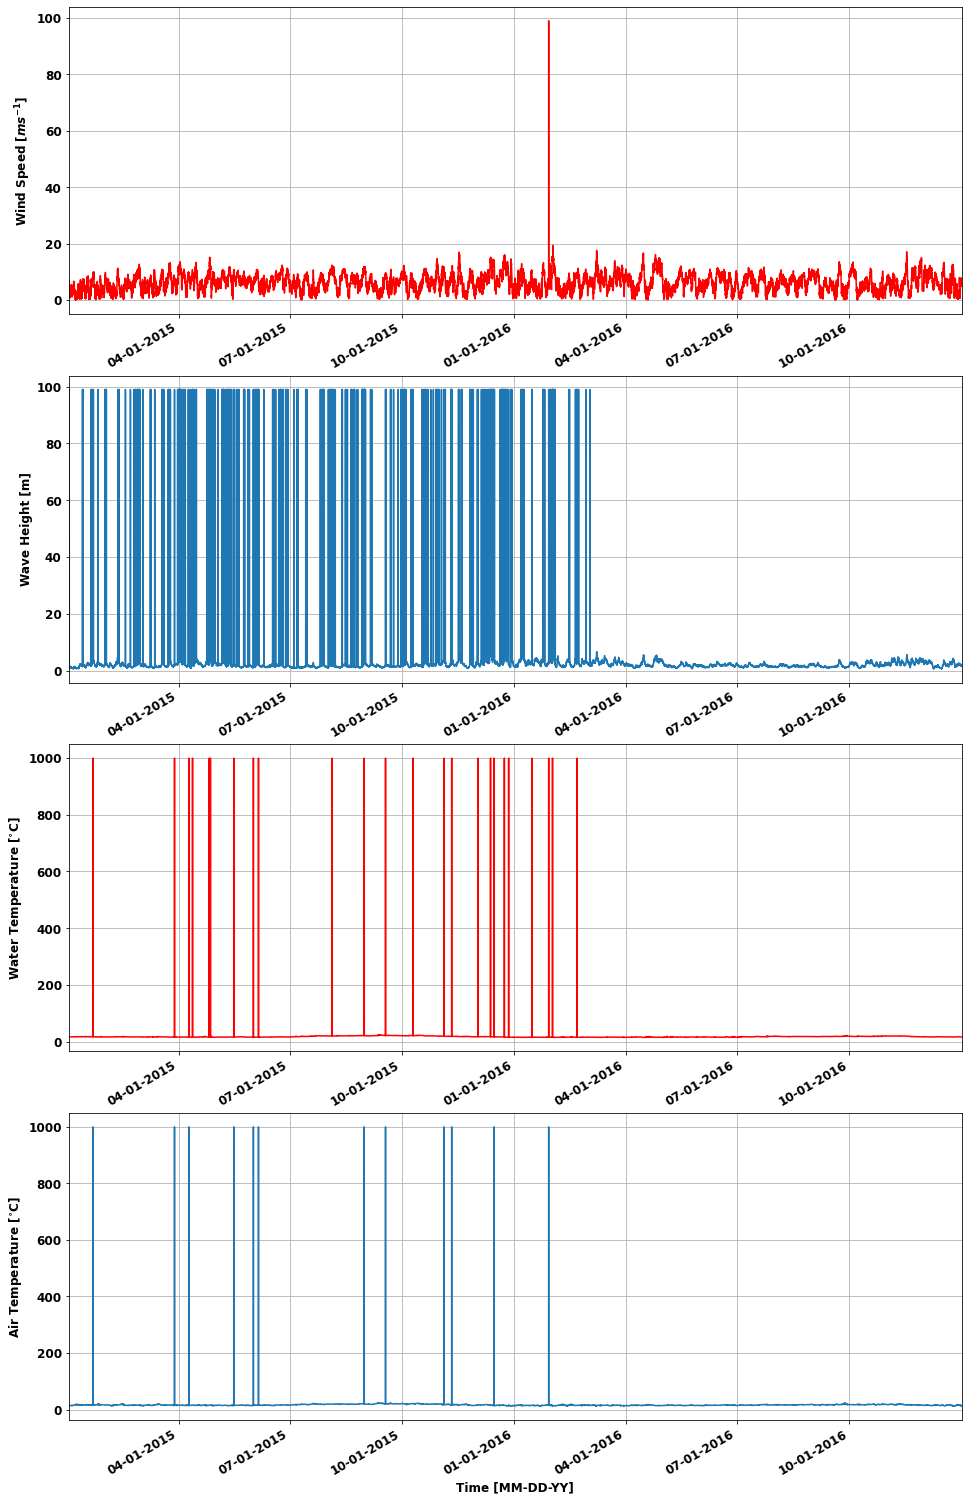

In [2]:
# Plotting packages
import matplotlib.pyplot as plt   # Plots
from matplotlib import rc         # Figure fonts
import matplotlib.dates as mdates # Manage dates on plots

#Creating plot
fig =plt.figure(figsize=(16,26))
rc('font',size=12)    
rc('font',weight='bold') 
rc('xtick',labelsize=12)  
rc('ytick',labelsize=12)

# Plot, limits and labels
ax = fig.add_subplot(411)
plt.plot(timev,wspd,color='red')
plt.xlim(timev[0],timev[-1])
plt.ylabel(u'Wind Speed [$m s^{-1}$]',fontsize=12,weight='bold')
# Setting datetick format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%Y'))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right') 
plt.grid()

ax = fig.add_subplot(412)
plt.plot(timev,wvht)
plt.xlim(timev[0],timev[-1])
plt.ylabel(u'Wave Height [m]',fontsize=12,weight='bold')
# Setting datetick format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%Y'))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right') 
plt.grid()

# Plot, limits and labels
ax = fig.add_subplot(413)
plt.plot(timev,wtemp,color='red')
plt.xlim(timev[0],timev[-1])
plt.ylabel(u'Water Temperature [$^{\circ}$C]',fontsize=12,weight='bold')
# Setting datetick format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%Y'))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right') 
plt.grid()

ax = fig.add_subplot(414)
plt.plot(timev,atemp)
plt.xlim(timev[0],timev[-1])
plt.xlabel('Time [MM-DD-YY]',fontsize=12,weight='bold')
plt.ylabel(u'Air Temperature [$^{\circ}$C]',fontsize=12,weight='bold')
# Setting datetick format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%Y'))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right') 
plt.grid()

plt.show()

There are a lot of spurious measurements. Let's cut them out:

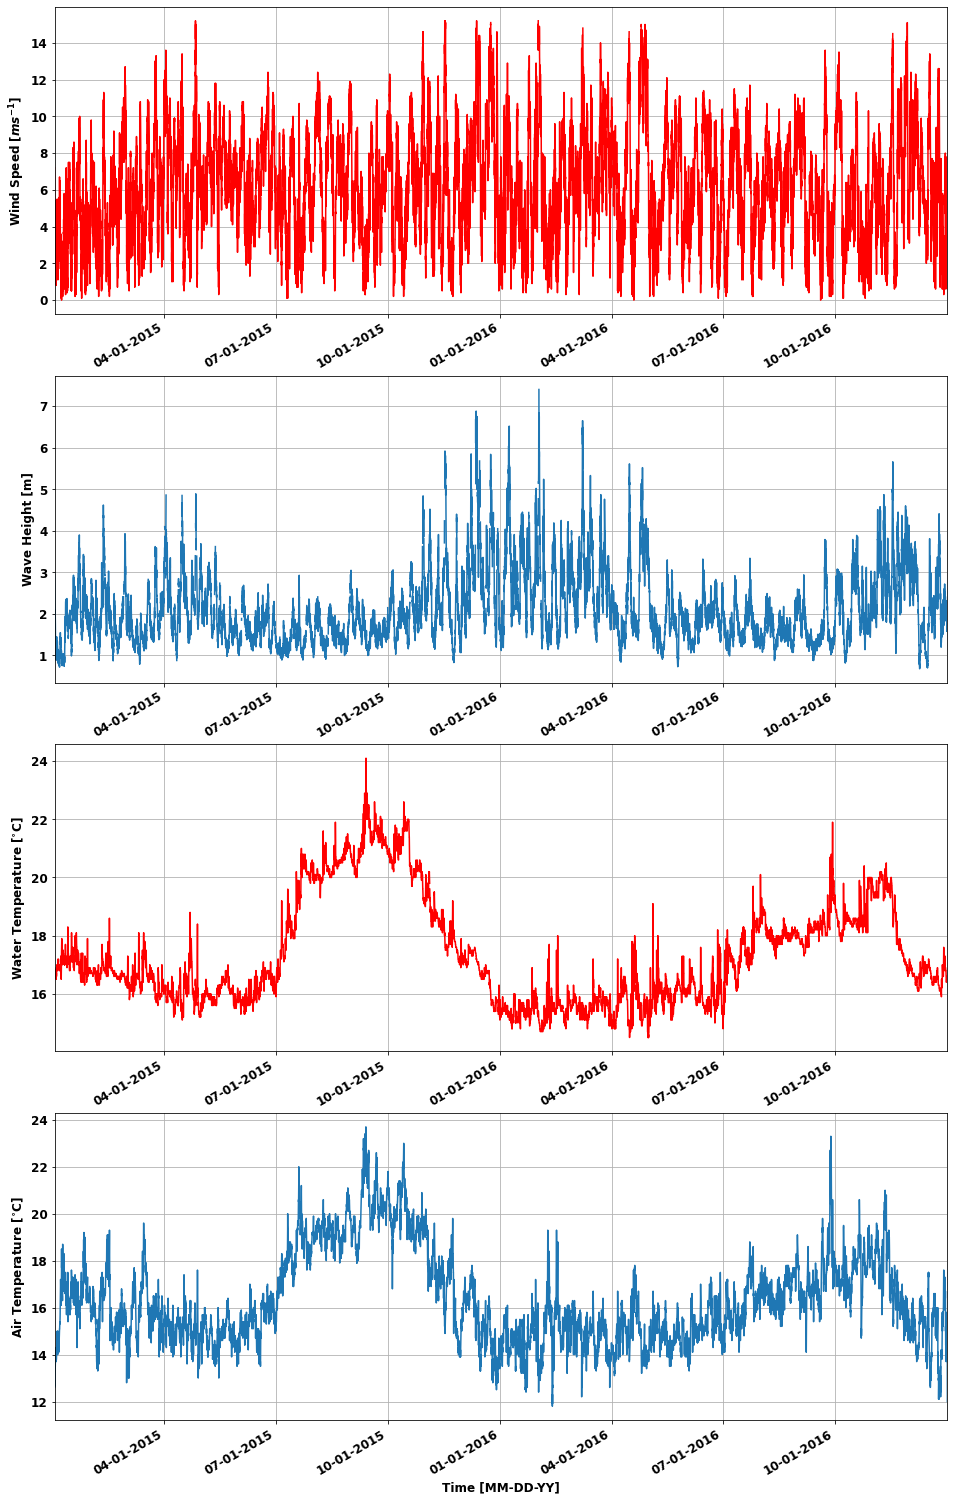

In [3]:
# Deleting spurious values
wspd[(wspd>np.nanmean(wspd)+3*np.nanstd(wspd))] = np.nan
wspd[(wspd<np.nanmean(wspd)-3*np.nanstd(wspd))] = np.nan

wvht[(wvht>np.nanmean(wvht)+3*np.nanstd(wvht))] = np.nan
wvht[(wvht<np.nanmean(wvht)-3*np.nanstd(wvht))] = np.nan

wtemp[(wtemp>np.nanmean(wtemp)+3*np.nanstd(wtemp))] = np.nan
wtemp[(wtemp<np.nanmean(wtemp)-3*np.nanstd(wtemp))] = np.nan

atemp[(atemp>np.nanmean(atemp)+3*np.nanstd(atemp))] = np.nan
atemp[(atemp<np.nanmean(atemp)-3*np.nanstd(atemp))] = np.nan

# Re-plotting
#Creating plot
fig =plt.figure(figsize=(16,26))
rc('font',size=12)    
rc('font',weight='bold') 
rc('xtick',labelsize=12)  
rc('ytick',labelsize=12)

# Plot, limits and labels
ax = fig.add_subplot(411)
plt.plot(timev,wspd,color='red')
plt.xlim(timev[0],timev[-1])
plt.ylabel(u'Wind Speed [$m s^{-1}$]',fontsize=12,weight='bold')
# Setting datetick format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%Y'))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right') 
plt.grid()

ax = fig.add_subplot(412)
plt.plot(timev,wvht)
plt.xlim(timev[0],timev[-1])
plt.ylabel(u'Wave Height [m]',fontsize=12,weight='bold')
# Setting datetick format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%Y'))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right') 
plt.grid()

# Plot, limits and labels
ax = fig.add_subplot(413)
plt.plot(timev,wtemp,color='red')
plt.xlim(timev[0],timev[-1])
plt.ylabel(u'Water Temperature [$^{\circ}$C]',fontsize=12,weight='bold')
# Setting datetick format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%Y'))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right') 
plt.grid()

ax = fig.add_subplot(414)
plt.plot(timev,atemp)
plt.xlim(timev[0],timev[-1])
plt.xlabel('Time [MM-DD-YY]',fontsize=12,weight='bold')
plt.ylabel(u'Air Temperature [$^{\circ}$C]',fontsize=12,weight='bold')
# Setting datetick format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%Y'))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right') 
plt.grid()

plt.show()



Where is the missing data?

In [4]:
# For the wind speed for example
mwspd = np.where(np.isnan(wspd))[0]
timev[mwspd]

DatetimeIndex(['2015-11-16 12:50:00', '2015-11-16 13:50:00',
               '2015-11-16 14:50:00', '2015-11-16 15:50:00',
               '2015-11-17 00:50:00', '2015-12-23 15:50:00',
               '2015-12-23 17:50:00', '2015-12-23 19:50:00',
               '2015-12-23 21:50:00', '2015-12-24 00:50:00',
               '2015-12-24 01:50:00', '2016-01-28 23:50:00',
               '2016-01-31 19:50:00', '2016-01-31 20:50:00',
               '2016-02-01 01:50:00', '2016-02-01 03:50:00',
               '2016-02-01 05:50:00', '2016-02-01 07:50:00',
               '2016-02-01 08:50:00', '2016-02-01 09:50:00',
               '2016-02-01 10:50:00', '2016-02-01 11:50:00',
               '2016-02-01 12:50:00', '2016-02-01 13:50:00',
               '2016-02-01 14:50:00', '2016-02-01 15:50:00',
               '2016-02-01 16:50:00', '2016-02-01 17:50:00',
               '2016-02-01 19:50:00', '2016-03-08 03:50:00',
               '2016-03-08 04:50:00', '2016-03-08 05:50:00',
               '2016-03-

### 2. Monthly means. Since there’s quite a bit of variability, average the data to produce monthly means for 2015 and 2016. Plot the means for each month and standard error of the mean. Data are provided at varying frequencies, but consecutive data are not independent. For the purposes of this problem set, let’s assume that the data provide one independent sample every 7 days.

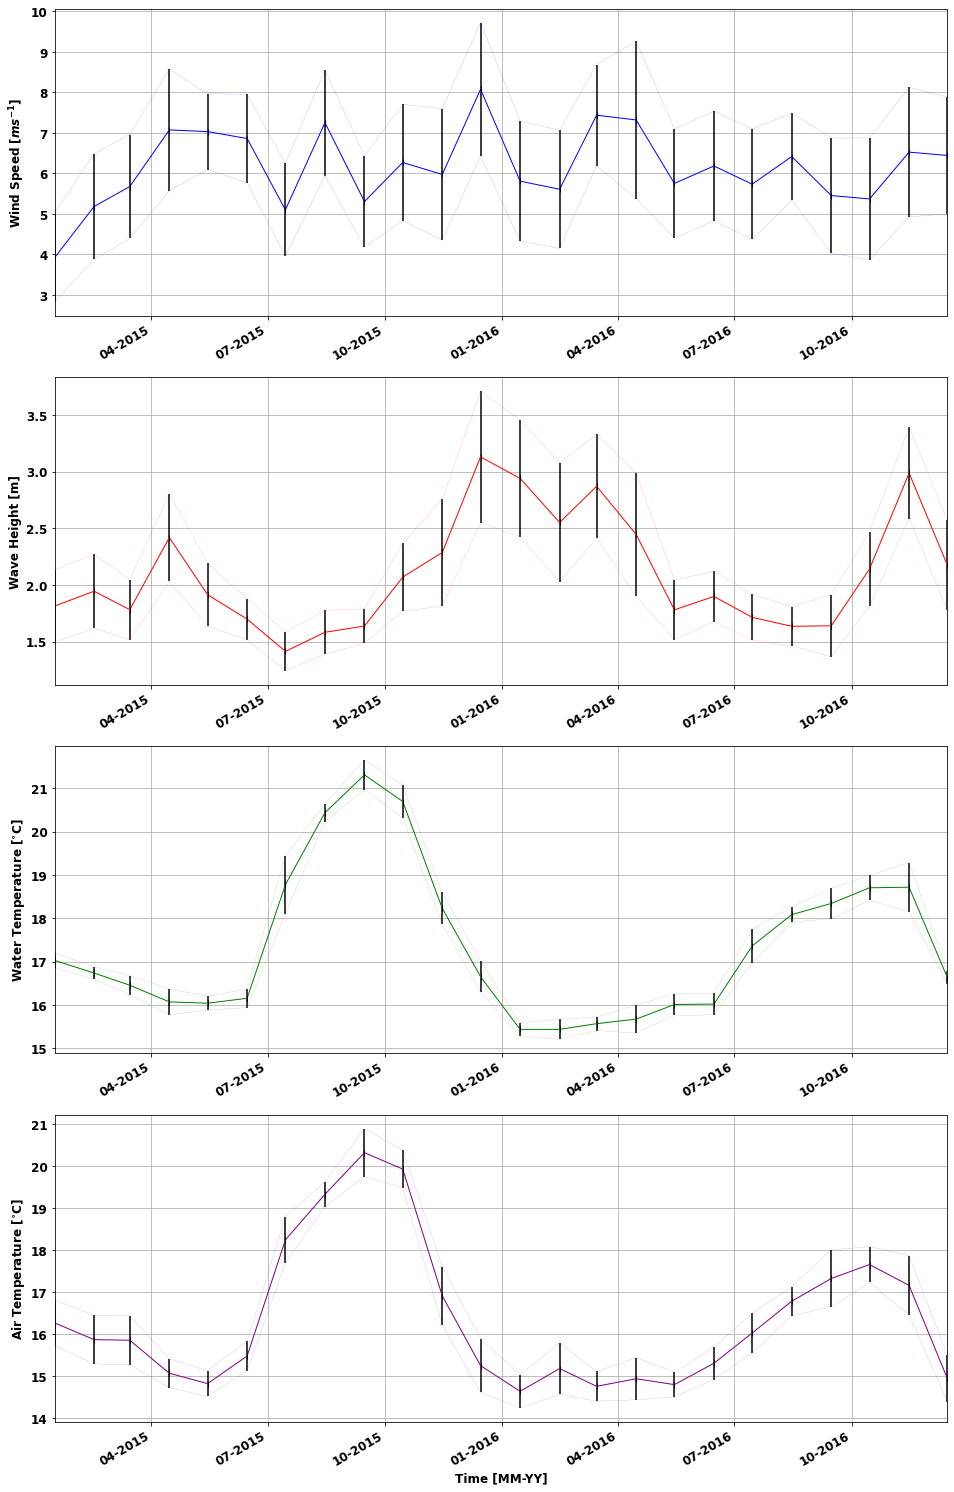

In [5]:

# Creating DataFrame to compute mean and standing error grouping by the time
df = pd.DataFrame({'wspd':wspd,'wvht':wvht,'wtemp':wtemp,'atemp':atemp})
df.index = timev # Indexing DataFrame with timev

# Computing grouped mean, std and N
dfmean = df.groupby(by=[df.index.year,df.index.month]).mean()
dfstd = df.groupby(by=[df.index.year,df.index.month]).std()
dfn = 4 # Approximately 4 independent samples per month 
# If we assume independent sample at every measurement: 
# dfn = df.groupby(by=[df.index.year,df.index.month]).count()

# Standard error
dferror = dfstd/np.sqrt(dfn)

# Creating Datetime vector for the monthly means. We fix the values on day 15 to plot 
# the mean data in the middle of each month.
timevm = [str(datetime.datetime(dfmean.index[i][0],dfmean.index[i][1],15)) for i in np.arange(dfmean.index.shape[0])]
timevm = pd.to_datetime(timevm)

#Creating plot
fig =plt.figure(figsize=(16,26))
rc('font',size=12)    
rc('font',weight='bold') 
rc('xtick',labelsize=12)  
rc('ytick',labelsize=12)

# Plot, limits and labels
ax = fig.add_subplot(411)
plt.errorbar(timevm,dfmean.wspd,yerr=dferror.wspd,fmt='|',color='black')
plt.xlim(timevm[0],timevm[-1])
plt.plot(timevm,dfmean.wspd,color='blue',linewidth=1)
plt.plot(timevm,dfmean.wspd+dferror.wspd,color='blue',linewidth=0.1)
plt.plot(timevm,dfmean.wspd-dferror.wspd,color='blue',linewidth=0.1)
plt.ylabel(u'Wind Speed [$m s^{-1}$]',fontsize=12,weight='bold')
# Setting datetick format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right') 
plt.grid()

ax = fig.add_subplot(412)
plt.errorbar(timevm,dfmean.wvht,yerr=dferror.wvht,fmt='|',color='black')
plt.xlim(timevm[0],timevm[-1])
plt.plot(timevm,dfmean.wvht,color='red',linewidth=1)
plt.plot(timevm,dfmean.wvht+dferror.wvht,color='red',linewidth=0.1)
plt.plot(timevm,dfmean.wvht-dferror.wvht,color='red',linewidth=0.1)
plt.ylabel(u'Wave Height [m]',fontsize=12,weight='bold')
# Setting datetick format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right') 
plt.grid()

# Plot, limits and labels
ax = fig.add_subplot(413)
plt.errorbar(timevm,dfmean.wtemp,yerr=dferror.wtemp,fmt='|',color='black')
plt.xlim(timevm[0],timevm[-1])
plt.plot(timevm,dfmean.wtemp,color='green',linewidth=1)
plt.plot(timevm,dfmean.wtemp+dferror.wtemp,color='green',linewidth=0.1)
plt.plot(timevm,dfmean.wtemp-dferror.wtemp,color='green',linewidth=0.1)
plt.ylabel(u'Water Temperature [$^{\circ}$C]',fontsize=12,weight='bold')
# Setting datetick format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right') 
plt.grid()

ax = fig.add_subplot(414)
plt.errorbar(timevm,dfmean.atemp,yerr=dferror.atemp,fmt='|',color='black')
plt.xlim(timevm[0],timevm[-1])
plt.plot(timevm,dfmean.atemp,color='purple',linewidth=1)
plt.plot(timevm,dfmean.atemp+dferror.atemp,color='purple',linewidth=0.1)
plt.plot(timevm,dfmean.atemp-dferror.atemp,color='purple',linewidth=0.1)
plt.xlabel('Time [MM-YY]',fontsize=12,weight='bold')
plt.ylabel(u'Air Temperature [$^{\circ}$C]',fontsize=12,weight='bold')
# Setting datetick format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right') 
plt.grid()

plt.show()




### 3. Least-squares fit. Treating the two years separately, least-squares fit a mean and an annual cycle to the four data records. What is the mean, and what is the amplitude of the annual cycle? (Total amplitude should be determined from the square root of the sum of the squares of the sine and cosine amplitudes.) Are the fitted coefficients similar for the two years?

To perform our least-squares fit, let's assume that a variable $Y$ is a function of $t$ as follows:

$$
{\bf Y}=Y_o + C_1 sin(\omega_{A} {\bf t}) + C_2 cos(\omega_{A} {\bf t}),\hspace{3cm} (1),
$$

where $\textbf{Y}$ is the measurements vector, $\textbf{t}$ is the time vector, $Y_0$ is the mean, $\omega_A$ is the frequency of the annual cycle, and $C_1$ and $C2$ are constants. We can rewrite this equation in matricial form:

$$
{\bf Y} = {\bf A}{\bf x} \hspace{3cm} (2)
$$

or:

$$
\underbrace{\left[\begin{array}{c}
                              Y_1  \\
                              Y_2  \\
                              Y_3  \\
                              \vdots \\
                              Y_N  \end{array}\right]}_{\bf Y} = \underbrace{\left[\begin{array}{c}
                              Y_0  \\
                              C_1  \\
                              C_2  \\ 
                              \end{array}\right]}_{\bf x} \underbrace{\left[\begin{array}{ccc}
                              1 & sin(\omega_A t_1) & cos(\omega_A t_1)  \\
                              1 & sin(\omega_A t_2) & cos(\omega_A t_2)  \\
                              1 & sin(\omega_A t_3) & cos(\omega_A t_3)  \\
                              \vdots & \vdots & \vdots \\
                              1 & sin(\omega_A t_N) & cos(\omega_A t_N)  \end{array}\right]}_{\bf A},\hspace{3cm} (3)
$$

We want to minimize the squared errors between the measurements ${\bf Y}$ and the model ${\bf Ax}$. First, let's define the squared error:
$$
\epsilon = ({\bf Ax} - {\bf y})^T({\bf Ax} - {\bf y}) = {\bf x}^T{\bf A}^T{\bf Ax} - 2{\bf x}^T{\bf A}^T{\bf y} + {\bf y}^T{\bf y}.\hspace{3cm} (4)
$$

Now, let's minimize it by taking the derivative of $\epsilon$ with respect to our coefficients ${\bf x}$:

$$
\frac{\partial\epsilon}{\partial {\bf x}} = 2{\bf A}^T{\bf Ax} - 2{\bf A}^T{\bf y} = 0,\hspace{3cm} (5)
$$

Thus, the coefficients that minimize the squared error between the measurements and the model are obtained by applying:

$$
 {\bf x} = ({\bf A}^T{\bf A})^{-1}{\bf A}^T{\bf y}.\hspace{3cm} (6)
$$

Let's use this model to fit an annual cycle to our data:

In [6]:
# Writting function to perform the least squares fit to an annual cycle
def anualfit(var,t):
    from scipy.linalg import inv
    A = np.array([np.ones(t.shape[0]), np.sin(2*np.pi*t/12), np.cos(2*np.pi*t/12) ]).T
    x = np.dot(inv(np.dot(A.T, A)), np.dot(A.T,var)) # Coefficients
    fit = np.dot(A, x) # Fit
    return fit,x


# Annual fit for 2015
wspdfita15,wspdvala15 = anualfit(dfmean.wspd[2015],np.arange(1,13))
wvhtfita15,wvhtvala15 = anualfit(dfmean.wvht[2015],np.arange(1,13))
wtempfita15,wtempvala15 = anualfit(dfmean.wtemp[2015],np.arange(1,13))
atempfita15,atempvala15 = anualfit(dfmean.atemp[2015],np.arange(1,13))

# Annual fit for 2016
wspdfita16,wspdvala16 = anualfit(dfmean.wspd[2016],np.arange(1,13))
wvhtfita16,wvhtvala16 = anualfit(dfmean.wvht[2016],np.arange(1,13))
wtempfita16,wtempvala16 = anualfit(dfmean.wtemp[2016],np.arange(1,13))
atempfita16,atempvala16 = anualfit(dfmean.atemp[2016],np.arange(1,13))

print('Year 2015')
print('Wind speed        - Mean:', round(wspdvala15[0],2),'  m/s   Annual cycle amplitude:', round(np.sqrt(wspdvala15[1]**2+wspdvala15[2]**2),2),' m/s')
print('Wave height       - Mean:', round(wvhtvala15[0],2),'   m    Annual cycle amplitude:', round(np.sqrt(wvhtvala15[1]**2+wvhtvala15[2]**2),2),' m')
print('Water temperature - Mean:', round(wtempvala15[0],2),' °C    Annual cycle amplitude:', round(np.sqrt(wtempvala15[1]**2+wtempvala15[2]**2),2),' °C')
print('Air temperature   - Mean:', round(atempvala15[0],2),' °C    Annual cycle amplitude:', round(np.sqrt(atempvala15[1]**2+atempvala15[2]**2),2),' °C')

print('\n\nYear 2016')
print('Wind speed        - Mean:', round(wspdvala16[0],2),'  m/s   Annual cycle amplitude:', round(np.sqrt(wspdvala16[1]**2+wspdvala16[2]**2),2),' m/s')
print('Wave height       - Mean:', round(wvhtvala16[0],2),'   m    Annual cycle amplitude:', round(np.sqrt(wvhtvala16[1]**2+wvhtvala16[2]**2),2),' m')
print('Water temperature - Mean:', round(wtempvala16[0],2),' °C    Annual cycle amplitude:', round(np.sqrt(wtempvala16[1]**2+wtempvala16[2]**2),2),' °C')
print('Air temperature   - Mean:', round(atempvala16[0],2),'  °C    Annual cycle amplitude:', round(np.sqrt(atempvala16[1]**2+atempvala16[2]**2),2),' °C')


Year 2015
Wind speed        - Mean: 6.14   m/s   Annual cycle amplitude: 0.38  m/s
Wave height       - Mean: 1.97    m    Annual cycle amplitude: 0.37  m
Water temperature - Mean: 17.88  °C    Annual cycle amplitude: 2.35  °C
Air temperature   - Mean: 16.95  °C    Annual cycle amplitude: 2.28  °C


Year 2016
Wind speed        - Mean: 6.17   m/s   Annual cycle amplitude: 0.44  m/s
Wave height       - Mean: 2.23    m    Annual cycle amplitude: 0.59  m
Water temperature - Mean: 16.83  °C    Annual cycle amplitude: 1.69  °C
Air temperature   - Mean: 15.8   °C    Annual cycle amplitude: 1.37  °C


The mean and amplitudes are not the same for the two years.

Let's plot the fit and compare it to the monthly means:

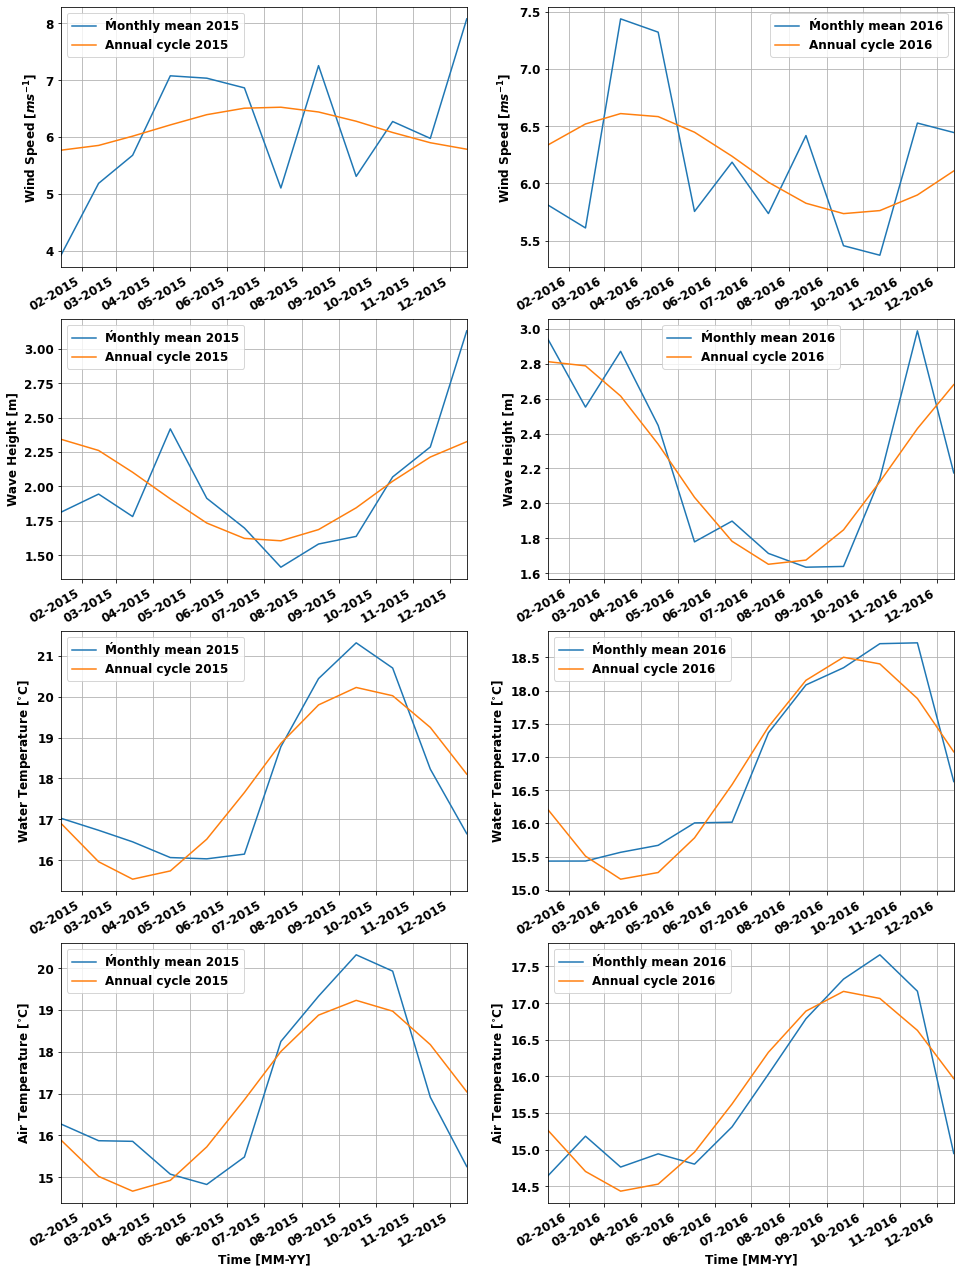

In [7]:

#Creating plot
fig =plt.figure(figsize=(16,22))
rc('font',size=12)    
rc('font',weight='bold') 
rc('xtick',labelsize=12)  
rc('ytick',labelsize=12)

# Plot, limits and labels
ax = fig.add_subplot(421)
plt.xlim(timevm[timevm.year==2015][0],timevm[timevm.year==2015][-1])
plt.plot(timevm[timevm.year==2015],dfmean.wspd[2015],label='Ḿonthly mean 2015')
plt.plot(timevm[timevm.year==2015],wspdfita15,label='Annual cycle 2015')
plt.legend(loc='best')
plt.ylabel(u'Wind Speed [$m s^{-1}$]',fontsize=12,weight='bold')
# Setting datetick format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right') 
plt.grid()

ax = fig.add_subplot(422)
plt.xlim(timevm[timevm.year==2016][0],timevm[timevm.year==2016][-1])
plt.plot(timevm[timevm.year==2016],dfmean.wspd[2016],label='Ḿonthly mean 2016')
plt.plot(timevm[timevm.year==2016],wspdfita16,label='Annual cycle 2016')
plt.legend(loc='best')
plt.ylabel(u'Wind Speed [$m s^{-1}$]',fontsize=12,weight='bold')
# Setting datetick format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right') 
plt.grid()

ax = fig.add_subplot(423)
plt.xlim(timevm[timevm.year==2015][0],timevm[timevm.year==2015][-1])
plt.plot(timevm[timevm.year==2015],dfmean.wvht[2015],label='Ḿonthly mean 2015')
plt.plot(timevm[timevm.year==2015],wvhtfita15,label='Annual cycle 2015')
plt.legend(loc='best')
plt.ylabel(u'Wave Height [m]',fontsize=12,weight='bold')
# Setting datetick format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right') 
plt.grid()

ax = fig.add_subplot(424)
plt.xlim(timevm[timevm.year==2016][0],timevm[timevm.year==2016][-1])
plt.plot(timevm[timevm.year==2016],dfmean.wvht[2016],label='Ḿonthly mean 2016')
plt.plot(timevm[timevm.year==2016],wvhtfita16,label='Annual cycle 2016')
plt.legend(loc='best')
plt.ylabel(u'Wave Height [m]',fontsize=12,weight='bold')
# Setting datetick format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right') 
plt.grid()

ax = fig.add_subplot(425)
plt.xlim(timevm[timevm.year==2015][0],timevm[timevm.year==2015][-1])
plt.plot(timevm[timevm.year==2015],dfmean.wtemp[2015],label='Ḿonthly mean 2015')
plt.plot(timevm[timevm.year==2015],wtempfita15,label='Annual cycle 2015')
plt.legend(loc='best')
plt.ylabel(u'Water Temperature [$^{\circ}$C]',fontsize=12,weight='bold')
# Setting datetick format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right') 
plt.grid()

ax = fig.add_subplot(426)
plt.xlim(timevm[timevm.year==2016][0],timevm[timevm.year==2016][-1])
plt.plot(timevm[timevm.year==2016],dfmean.wtemp[2016],label='Ḿonthly mean 2016')
plt.plot(timevm[timevm.year==2016],wtempfita16,label='Annual cycle 2016')
plt.legend(loc='best')
plt.ylabel(u'Water Temperature [$^{\circ}$C]',fontsize=12,weight='bold')
# Setting datetick format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right') 
plt.grid()


ax = fig.add_subplot(427)
plt.xlim(timevm[timevm.year==2015][0],timevm[timevm.year==2015][-1])
plt.plot(timevm[timevm.year==2015],dfmean.atemp[2015],label='Ḿonthly mean 2015')
plt.plot(timevm[timevm.year==2015],atempfita15,label='Annual cycle 2015')
plt.legend(loc='best')
plt.xlabel('Time [MM-YY]',fontsize=12,weight='bold')
plt.ylabel(u'Air Temperature [$^{\circ}$C]',fontsize=12,weight='bold')
# Setting datetick format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right') 
plt.grid()

ax = fig.add_subplot(428)
plt.xlim(timevm[timevm.year==2016][0],timevm[timevm.year==2016][-1])
plt.plot(timevm[timevm.year==2016],dfmean.atemp[2016],label='Ḿonthly mean 2016')
plt.plot(timevm[timevm.year==2016],atempfita16,label='Annual cycle 2016')
plt.legend(loc='best')
plt.xlabel('Time [MM-YY]',fontsize=12,weight='bold')
plt.ylabel(u'Air Temperature [$^{\circ}$C]',fontsize=12,weight='bold')
# Setting datetick format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right') 
plt.grid()

plt.show()




### 4. Least-squares fit a semi-annual cycle. Augment your annual cycle least-squares fit with a semi-annual cycle. What is the amplitude of the semi-annual cycle? Does the augmented fit give you a different annual cycle?

To augment our annual-cycle with a semi-annual cycle, our model turns into:

$$
{\bf Y}=Y_o + C_1 sin(\omega_{A} {\bf t}) + C_2 cos(\omega_{A} {\bf t}) + C_3 sin(\omega_{S} {\bf t}) + C_4 cos(\omega_{S} {\bf t}),\hspace{3cm} (7),
$$

where $\omega_S$ is the frequency of the semi-annual cycle, and $C_3$ and $C4$ are also constants. Once again, we can rewrite this equation in matricial form:

$$
\underbrace{\left[\begin{array}{c}
                              Y_1  \\
                              Y_2  \\
                              Y_3  \\
                              \vdots \\
                              Y_N  \end{array}\right]}_{\bf Y} = \underbrace{\left[\begin{array}{c}
                              Y_0  \\
                              C_1  \\
                              C_2  \\ 
                              C_3  \\
                              C_4  \\ 
                              \end{array}\right]}_{\bf x} \underbrace{\left[\begin{array}{ccccc}
                              1 & sin(\omega_A t_1) & cos(\omega_A t_1) & sin(\omega_S t_1) & cos(\omega_S t_1)  \\
                              1 & sin(\omega_A t_2) & cos(\omega_A t_2) & sin(\omega_S t_2) & cos(\omega_S t_2) \\
                              1 & sin(\omega_A t_3) & cos(\omega_A t_3) & sin(\omega_S t_3) & cos(\omega_S t_3) \\
                              \vdots & \vdots & \vdots & \vdots & \vdots\\
                              1 & sin(\omega_A t_N) & cos(\omega_A t_N) & sin(\omega_S t_N) & cos(\omega_S t_N) \end{array}\right]}_{\bf A}.
$$

By applying Equation 6 using these new matrices, we find the least squares fit for the annual and semi-annual cycles.

In [8]:
# Writting function to perform the least squares fit to an annual and a semi- annual cycle
def anualsemianualfit(var,t):
    from scipy.linalg import inv
    A = np.array([np.ones(t.shape[0]),np.sin(2*np.pi*t/12), np.cos(2*np.pi*t/12),np.sin(2*np.pi*t/6), np.cos(2*np.pi*t/6) ]).T
    x = np.dot(inv(np.dot(A.T, A)), np.dot(A.T,var)) # Coefficients
    fit = np.dot(A, x) # Fit
    return fit,x

# Annual fit for 2015
wspdfits15,wspdvals15 = anualsemianualfit(dfmean.wspd[2015],np.arange(1,13))
wvhtfits15,wvhtvals15 = anualsemianualfit(dfmean.wvht[2015],np.arange(1,13))
wtempfits15,wtempvals15 = anualsemianualfit(dfmean.wtemp[2015],np.arange(1,13))
atempfits15,atempvals15 = anualsemianualfit(dfmean.atemp[2015],np.arange(1,13))

# Annual fit for 2016
wspdfits16,wspdvals16 = anualsemianualfit(dfmean.wspd[2016],np.arange(1,13))
wvhtfits16,wvhtvals16 = anualsemianualfit(dfmean.wvht[2016],np.arange(1,13))
wtempfits16,wtempvals16 = anualsemianualfit(dfmean.wtemp[2016],np.arange(1,13))
atempfits16,atempvals16 = anualsemianualfit(dfmean.atemp[2016],np.arange(1,13))

print('Year 2015')
print('Wind speed        - Mean:', round(wspdvals15[0],2),'  m/s   Annual cycle amplitude:', round(np.sqrt(wspdvals15[1]**2+wspdvals15[2]**2),2),' m/s     Semi-annual cycle amplitude:', round(np.sqrt(wspdvals15[3]**2+wspdvals15[4]**2),2),' m/s')
print('Wave height       - Mean:', round(wvhtvals15[0],2),'   m    Annual cycle amplitude:', round(np.sqrt(wvhtvals15[1]**2+wvhtvals15[2]**2),2),'  m      Semi-annual cycle amplitude:', round(np.sqrt(wvhtvals15[3]**2+wvhtvals15[4]**2),2),'  m')
print('Water temperature - Mean:', round(wtempvals15[0],2),' °C    Annual cycle amplitude:', round(np.sqrt(wtempvals15[1]**2+wtempvals15[2]**2),2),' °C      Semi-annual cycle amplitude:', round(np.sqrt(wtempvals15[3]**2+wtempvals15[4]**2),2),' °C')
print('Air temperature   - Mean:', round(atempvals15[0],2),' °C    Annual cycle amplitude:', round(np.sqrt(atempvals15[1]**2+atempvals15[2]**2),2),' °C      Semi-annual cycle amplitude:', round(np.sqrt(atempvals15[3]**2+atempvals15[4]**2),2),' °C')

print('\n\nYear 2016')
print('Wind speed        - Mean:', round(wspdvals16[0],2),'  m/s   Annual cycle amplitude:', round(np.sqrt(wspdvals16[1]**2+wspdvals16[2]**2),2),' m/s     Semi-annual cycle amplitude:', round(np.sqrt(wspdvals16[3]**2+wspdvals16[4]**2),2),' m/s')
print('Wave height       - Mean:', round(wvhtvals16[0],2),'   m    Annual cycle amplitude:', round(np.sqrt(wvhtvals16[1]**2+wvhtvals16[2]**2),2),'  m      Semi-annual cycle amplitude:', round(np.sqrt(wvhtvals16[3]**2+wvhtvals16[4]**2),2),'  m')
print('Water temperature - Mean:', round(wtempvals16[0],2),' °C    Annual cycle amplitude:', round(np.sqrt(wtempvals16[1]**2+wtempvals16[2]**2),2),' °C      Semi-annual cycle amplitude:', round(np.sqrt(wtempvals16[3]**2+wtempvals16[4]**2),2),' °C')
print('Air temperature   - Mean:', round(atempvals16[0],2),'  °C    Annual cycle amplitude:', round(np.sqrt(atempvals16[1]**2+atempvals16[2]**2),2),' °C      Semi-annual cycle amplitude:', round(np.sqrt(atempvals16[3]**2+atempvals16[4]**2),2),' °C')


Year 2015
Wind speed        - Mean: 6.14   m/s   Annual cycle amplitude: 0.38  m/s     Semi-annual cycle amplitude: 0.79  m/s
Wave height       - Mean: 1.97    m    Annual cycle amplitude: 0.37   m      Semi-annual cycle amplitude: 0.34   m
Water temperature - Mean: 17.88  °C    Annual cycle amplitude: 2.35  °C      Semi-annual cycle amplitude: 1.18  °C
Air temperature   - Mean: 16.95  °C    Annual cycle amplitude: 2.28  °C      Semi-annual cycle amplitude: 1.31  °C


Year 2016
Wind speed        - Mean: 6.17   m/s   Annual cycle amplitude: 0.44  m/s     Semi-annual cycle amplitude: 0.23  m/s
Wave height       - Mean: 2.23    m    Annual cycle amplitude: 0.59   m      Semi-annual cycle amplitude: 0.08   m
Water temperature - Mean: 16.83  °C    Annual cycle amplitude: 1.69  °C      Semi-annual cycle amplitude: 0.47  °C
Air temperature   - Mean: 15.8   °C    Annual cycle amplitude: 1.37  °C      Semi-annual cycle amplitude: 0.54  °C


The augmented fit did not give a different annual cycle (amplitudes have not changed).

Let's plot the augmented fit and compare it to the monthly means:

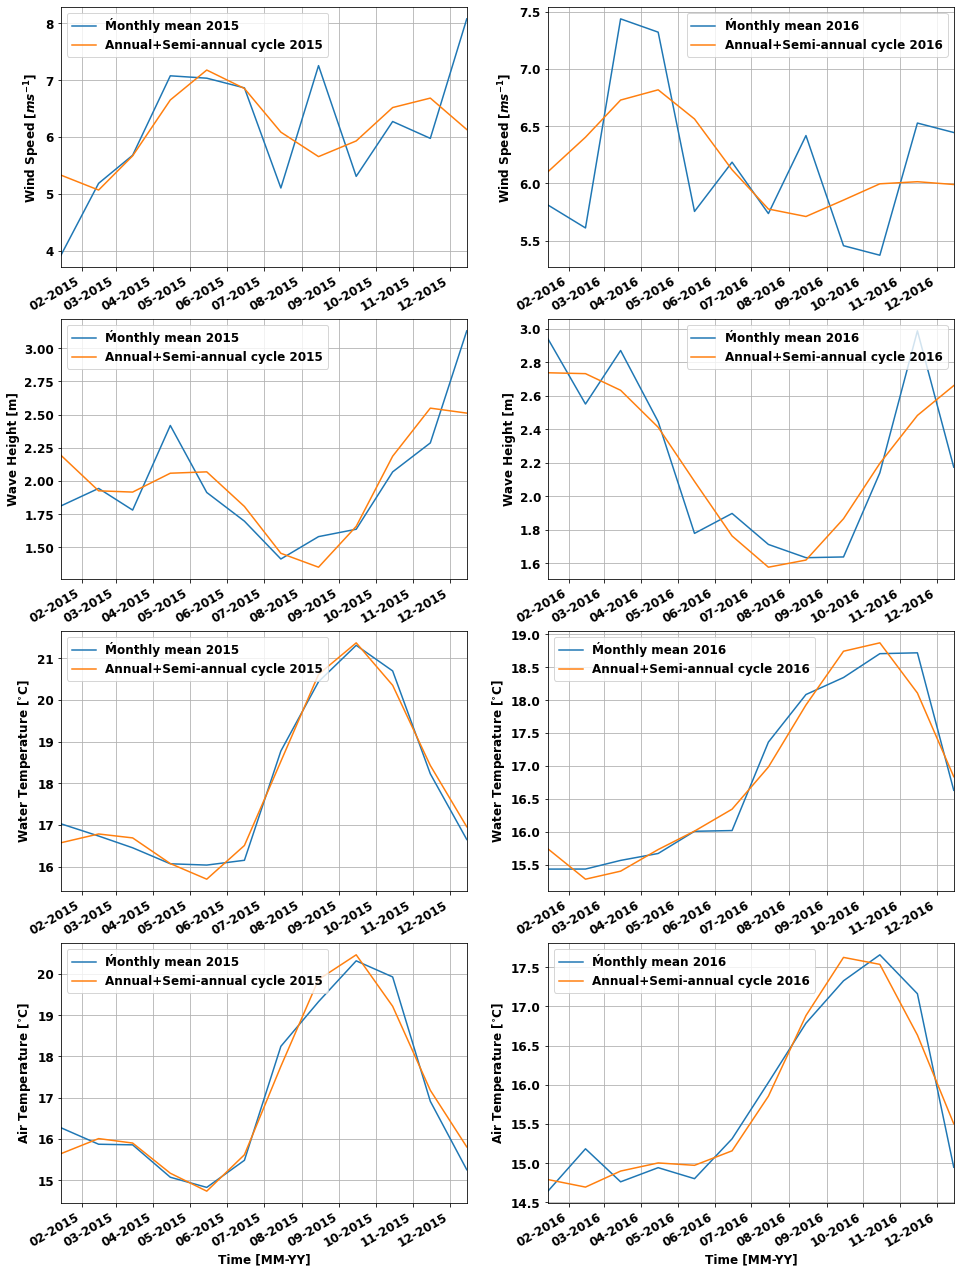

In [9]:

#Creating plot
fig =plt.figure(figsize=(16,22))
rc('font',size=12)    
rc('font',weight='bold') 
rc('xtick',labelsize=12)  
rc('ytick',labelsize=12)

# Plot, limits and labels
ax = fig.add_subplot(421)
plt.xlim(timevm[timevm.year==2015][0],timevm[timevm.year==2015][-1])
plt.plot(timevm[timevm.year==2015],dfmean.wspd[2015],label='Ḿonthly mean 2015')
plt.plot(timevm[timevm.year==2015],wspdfits15,label='Annual+Semi-annual cycle 2015')
plt.legend(loc='best')
plt.ylabel(u'Wind Speed [$m s^{-1}$]',fontsize=12,weight='bold')
# Setting datetick format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right') 
plt.grid()

ax = fig.add_subplot(422)
plt.xlim(timevm[timevm.year==2016][0],timevm[timevm.year==2016][-1])
plt.plot(timevm[timevm.year==2016],dfmean.wspd[2016],label='Ḿonthly mean 2016')
plt.plot(timevm[timevm.year==2016],wspdfits16,label='Annual+Semi-annual cycle 2016')
plt.legend(loc='best')
plt.ylabel(u'Wind Speed [$m s^{-1}$]',fontsize=12,weight='bold')
# Setting datetick format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right') 
plt.grid()

ax = fig.add_subplot(423)
plt.xlim(timevm[timevm.year==2015][0],timevm[timevm.year==2015][-1])
plt.plot(timevm[timevm.year==2015],dfmean.wvht[2015],label='Ḿonthly mean 2015')
plt.plot(timevm[timevm.year==2015],wvhtfits15,label='Annual+Semi-annual cycle 2015')
plt.legend(loc='best')
plt.ylabel(u'Wave Height [m]',fontsize=12,weight='bold')
# Setting datetick format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right') 
plt.grid()

ax = fig.add_subplot(424)
plt.xlim(timevm[timevm.year==2016][0],timevm[timevm.year==2016][-1])
plt.plot(timevm[timevm.year==2016],dfmean.wvht[2016],label='Ḿonthly mean 2016')
plt.plot(timevm[timevm.year==2016],wvhtfits16,label='Annual+Semi-annual cycle 2016')
plt.legend(loc='best')
plt.ylabel(u'Wave Height [m]',fontsize=12,weight='bold')
# Setting datetick format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right') 
plt.grid()

ax = fig.add_subplot(425)
plt.xlim(timevm[timevm.year==2015][0],timevm[timevm.year==2015][-1])
plt.plot(timevm[timevm.year==2015],dfmean.wtemp[2015],label='Ḿonthly mean 2015')
plt.plot(timevm[timevm.year==2015],wtempfits15,label='Annual+Semi-annual cycle 2015')
plt.legend(loc='best')
plt.ylabel(u'Water Temperature [$^{\circ}$C]',fontsize=12,weight='bold')
# Setting datetick format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right') 
plt.grid()

ax = fig.add_subplot(426)
plt.xlim(timevm[timevm.year==2016][0],timevm[timevm.year==2016][-1])
plt.plot(timevm[timevm.year==2016],dfmean.wtemp[2016],label='Ḿonthly mean 2016')
plt.plot(timevm[timevm.year==2016],wtempfits16,label='Annual+Semi-annual cycle 2016')
plt.legend(loc='best')
plt.ylabel(u'Water Temperature [$^{\circ}$C]',fontsize=12,weight='bold')
# Setting datetick format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right') 
plt.grid()


ax = fig.add_subplot(427)
plt.xlim(timevm[timevm.year==2015][0],timevm[timevm.year==2015][-1])
plt.plot(timevm[timevm.year==2015],dfmean.atemp[2015],label='Ḿonthly mean 2015')
plt.plot(timevm[timevm.year==2015],atempfits15,label='Annual+Semi-annual cycle 2015')
plt.legend(loc='best')
plt.xlabel('Time [MM-YY]',fontsize=12,weight='bold')
plt.ylabel(u'Air Temperature [$^{\circ}$C]',fontsize=12,weight='bold')
# Setting datetick format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right') 
plt.grid()

ax = fig.add_subplot(428)
plt.xlim(timevm[timevm.year==2016][0],timevm[timevm.year==2016][-1])
plt.plot(timevm[timevm.year==2016],dfmean.atemp[2016],label='Ḿonthly mean 2016')
plt.plot(timevm[timevm.year==2016],atempfits16,label='Annual+Semi-annual cycle 2016')
plt.legend(loc='best')
plt.xlabel('Time [MM-YY]',fontsize=12,weight='bold')
plt.ylabel(u'Air Temperature [$^{\circ}$C]',fontsize=12,weight='bold')
# Setting datetick format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right') 
plt.grid()

plt.show()




### 5. $\chi^2$ and the misfit. What is the squared misfit of your least-squares fits? You can compute this as

$$
\chi^2 = \sum_{i=1}^{N} \frac{(y_i - \sum_{j=1}^{M} a_{ij}x_j)^2}{\sigma_i^2} \sim  N - M \hspace{3cm} (8)
$$

### In other words, the misfit for each point should be roughly equal to the uncertainty. We lose a degree of freedom for each function that we use to fit. How much does the misfit change if you fit with an annual cycle only or with an annual plus semi-annnual cycle? 

In [10]:
# Chi^2 for annual cycle model

print('Year 2015 - Annual Cycle')
print('N = 12')
print('M = 3')
print('N - M = 9')
print('Wind speed misfit:        ', round(np.sum(((dfmean.wspd[2015] - wspdfita15)**2)/(dferror.wspd[2015])**2),2))
print('Wave height misfit:       ', round(np.sum(((dfmean.wvht[2015] - wvhtfita15)**2)/(dferror.wvht[2015])**2),2))
print('Air temperature misfit:   ', round(np.sum(((dfmean.atemp[2015] - atempfita15)**2)/(dferror.atemp[2015])**2),2))
print('Water temperature misfit: ', round(np.sum(((dfmean.wtemp[2015] - wtempfita15)**2)/(dferror.wtemp[2015])**2),2))

print('\nYear 2016 - Annual Cycle')
print('N = 12')
print('M = 3')
print('N - M = 9')
print('Wind speed misfit:        ', round(np.sum(((dfmean.wspd[2016] - wspdfita16)**2)/(dferror.wspd[2016])**2),2))
print('Wave height misfit:       ', round(np.sum(((dfmean.wvht[2016] - wvhtfita16)**2)/(dferror.wvht[2016])**2),2))
print('Air temperature misfit:   ', round(np.sum(((dfmean.atemp[2016] - atempfita16)**2)/(dferror.atemp[2016])**2),2))
print('Water temperature misfit: ', round(np.sum(((dfmean.wtemp[2016] - wtempfita16)**2)/(dferror.wtemp[2016])**2),2))

#((dfmean.wspd[2016] - wspdfita16)**2)/(dferror.wspd[2016]**2)


Year 2015 - Annual Cycle
N = 12
M = 3
N - M = 9
Wind speed misfit:         8.73
Wave height misfit:        12.88
Air temperature misfit:    53.32
Water temperature misfit:  152.36

Year 2016 - Annual Cycle
N = 12
M = 3
N - M = 9
Wind speed misfit:         2.02
Wave height misfit:        6.09
Air temperature misfit:    12.06
Water temperature misfit:  51.56


In [11]:
# Chi^2 for annual + semi-annual cycle model

print('Year 2015 - Annual + Semi-Annual Cycle')
print('N = 12')
print('M = 5')
print('N - M = 7')
print('Wind speed misfit:        ', round(np.sum(((dfmean.wspd[2015] - wspdfits15)**2)/(dferror.wspd[2015])**2),2))
print('Wave height misfit:       ', round(np.sum(((dfmean.wvht[2015] - wvhtfits15)**2)/(dferror.wvht[2015])**2),2))
print('Air temperature misfit:   ', round(np.sum(((dfmean.atemp[2015] - atempfits15)**2)/(dferror.atemp[2015])**2),2))
print('Water temperature misfit: ', round(np.sum(((dfmean.wtemp[2015] - wtempfits15)**2)/(dferror.wtemp[2015])**2),2))

print('\nYear 2016 - Annual + Semi-Annual Cycle')
print('N = 12')
print('M = 5')
print('N - M = 7')
print('Wind speed misfit:        ', round(np.sum(((dfmean.wspd[2016] - wspdfits16)**2)/(dferror.wspd[2016])**2),2))
print('Wave height misfit:       ', round(np.sum(((dfmean.wvht[2016] - wvhtfits16)**2)/(dferror.wvht[2016])**2),2))
print('Air temperature misfit:   ', round(np.sum(((dfmean.atemp[2016] - atempfits16)**2)/(dferror.atemp[2016])**2),2))
print('Water temperature misfit: ', round(np.sum(((dfmean.wtemp[2016] - wtempfits16)**2)/(dferror.wtemp[2016])**2),2))



Year 2015 - Annual + Semi-Annual Cycle
N = 12
M = 5
N - M = 7
Wind speed misfit:         5.94
Wave height misfit:        6.33
Air temperature misfit:    9.39
Water temperature misfit:  18.42

Year 2016 - Annual + Semi-Annual Cycle
N = 12
M = 5
N - M = 7
Wind speed misfit:         1.97
Wave height misfit:        6.53
Air temperature misfit:    3.48
Water temperature misfit:  13.6


Comparing the misfits of the annual cyle and the model augmented by the semi-annual cycle, we observe that the misfit decreases for all variables.

### Use the $\chi^2$ distribution to evaluate whether your fits are improved by adding the semi-annual fit? On the basis of the $\chi^2$ distribution, are you overfitting the data, or choosing the wrong model for your data? 

Some $\chi^2$ values are decreasing and getting close to N-M, as the Air Temperature (except by 2016) and Water Temperature, for example. This shows that the augmented model is performing better. 

However, in other cases the inclusion of the semi-annual cycle does not help. In air temperature (2016), for example, the $\chi^2$ drops from ~12 to ~4 and is far from N-M = 7. This probably happen because the annual cycle, for that case, already representes well the time-series. A case of overfitting data. 

Finally, for wind speed, the misfit decreases but stays distant from N-M=7. Observing the plots, we observe that we are probably not usinga good model.

### How would your results change if you assumed that you had one independent sample (i.e. one degree of freedom) per day, instead of one per week?

In [12]:
# Days per month
_,dfn = np.meshgrid(np.arange(4),np.array([31,28,31,30,31,30,31,31,30,31,30,31,31,28,31,30,31,30,31,31,30,31,30,31]))
dferror2 = dfstd/np.sqrt(dfn)


print('Year 2015 - Annual + Semi-Annual Cycle')
print('N = 12')
print('M = 5')
print('N - M = 7')
print('Wind speed misfit:        ', round(np.sum(((dfmean.wspd[2015] - wspdfits15)**2)/(dferror2.wspd[2015])**2),2))
print('Wave height misfit:       ', round(np.sum(((dfmean.wvht[2015] - wvhtfits15)**2)/(dferror2.wvht[2015])**2),2))
print('Air temperature misfit:   ', round(np.sum(((dfmean.atemp[2015] - atempfits15)**2)/(dferror2.atemp[2015])**2),2))
print('Water temperature misfit: ', round(np.sum(((dfmean.wtemp[2015] - wtempfits15)**2)/(dferror2.wtemp[2015])**2),2))

print('\nYear 2016 - Annual + Semi-Annual Cycle')
print('N = 12')
print('M = 5')
print('N - M = 7')
print('Wind speed misfit:        ', round(np.sum(((dfmean.wspd[2016] - wspdfits16)**2)/(dferror2.wspd[2016])**2),2))
print('Wave height misfit:       ', round(np.sum(((dfmean.wvht[2016] - wvhtfits16)**2)/(dferror2.wvht[2016])**2),2))
print('Air temperature misfit:   ', round(np.sum(((dfmean.atemp[2016] - atempfits16)**2)/(dferror2.atemp[2016])**2),2))
print('Water temperature misfit: ', round(np.sum(((dfmean.wtemp[2016] - wtempfits16)**2)/(dferror2.wtemp[2016])**2),2))



Year 2015 - Annual + Semi-Annual Cycle
N = 12
M = 5
N - M = 7
Wind speed misfit:         45.86
Wave height misfit:        48.66
Air temperature misfit:    72.61
Water temperature misfit:  141.87

Year 2016 - Annual + Semi-Annual Cycle
N = 12
M = 5
N - M = 7
Wind speed misfit:         15.0
Wave height misfit:        49.86
Air temperature misfit:    26.28
Water temperature misfit:  104.03


The misfits increase a lot and get too far away from the expected N-M.